In [1]:
import twint
import pandas as pd
import nest_asyncio
nest_asyncio.apply()
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [58]:
c = twint.Config()
c.Search = "blendysug"
c.Store_json = True
c.Output = "/Users/mugzi/blendys_1.json"
twint.run.Search(c)

1572539879376158724 2022-09-21 11:54:58 +0100 <EssenProductsug> @blendysug @blendysug X @EssenProductsug 🔥🔥
1572535610862366720 2022-09-21 11:38:00 +0100 <blendysug> Gift box idea for her 🥰. Only at 100k  @EssenProductsug * @blendysug  https://t.co/Og8oliKbQB
1572267614956822528 2022-09-20 17:53:05 +0100 <blendysug> @Jude_Mugabi ☺️☺️ thank you please
1571921048563601409 2022-09-19 18:55:57 +0100 <Jude_Mugabi> @blendysug
1552177942461124608 2022-07-27 07:23:54 +0100 <ImaniMulungi> @blendysug My doctor won't be pleased at all😭
1552172680249372674 2022-07-27 07:02:59 +0100 <blendysug> 😂😂😂😂
1552165384467488768 2022-07-27 06:34:00 +0100 <AlvinKaly> @blendysug @kanyindo Out there to cause trouble with my sweet tooth.
1552151017713766402 2022-07-27 05:36:54 +0100 <kanyindo> @AlvinKaly @blendysug Dear Sweet Baby Jesus in the Manger. These look delicious.
1552147753697943554 2022-07-27 05:23:56 +0100 <blendysug> @AlvinKaly @kanyindo Hahhaa, thanks Alvin, you had Nutella brownies though 😅. These

In [59]:
df = pd.read_json("/Users/mugzi/blendys_1.json",lines=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype                               
---  ------           --------------  -----                               
 0   id               20 non-null     int64                               
 1   conversation_id  20 non-null     int64                               
 2   created_at       20 non-null     datetime64[ns, pytz.FixedOffset(60)]
 3   date             20 non-null     datetime64[ns]                      
 4   time             20 non-null     object                              
 5   timezone         20 non-null     int64                               
 6   user_id          20 non-null     int64                               
 7   username         20 non-null     object                              
 8   name             20 non-null     object                              
 9   place            20 non-null     object                            

In [67]:
df.corr()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,retweet,video
id,1.000000,0.999962,NaN,-0.080080,0.061061,0.389872,0.236154,NaN,-0.048538
conversation_id,0.999962,1.000000,NaN,-0.080002,0.063208,0.394530,0.237648,NaN,-0.045936
timezone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,-0.080080,-0.080002,NaN,1.000000,0.139806,-0.059465,0.020518,NaN,0.018992
replies_count,0.061061,0.063208,NaN,0.139806,1.000000,0.372678,0.474156,NaN,0.086066
retweets_count,0.389872,0.394530,NaN,-0.059465,0.372678,1.000000,0.390363,NaN,0.577350
likes_count,0.236154,0.237648,NaN,0.020518,0.474156,0.390363,1.000000,NaN,0.367279
retweet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video,-0.048538,-0.045936,NaN,0.018992,0.086066,0.577350,0.367279,NaN,1.000000


In [28]:
df[["username","tweet","replies_count","retweets_count","likes_count"]]

,username,tweet,replies_count,retweets_count,likes_count
0,bagyzug,@NimwesigaBridg1 Contact me Bridget,0,0,0
1,talmamoureen,Nyege Nyege 2022.. We did it💪🏾💪🏾,0,0,0
2,saidiseiko,@JonathanSsegaw2 George Street,0,0,0
3,genza_innocent,@CharityKarungi_ @MaamaKampala21 @Johnlaban256...,1,0,0
4,the_muhseen,@moses_haonga Tafta mke akutoe nyege,0,0,0
...,...,...,...,...,...
18579,mculture0,@Bg0047 Sio ujanja wala ushamba ni nyege,0,0,1
18580,obotetommy1,"@Joshuabasiima I see papa, don, nyege, bade, b...",0,1,5
18581,elijah_engola,Nyege nyege all the way,0,0,0
18582,lwangamundo,Valid question. Nyege pays for rent. Choose wi...,1,0,1


In [62]:
#create a function to clean tweets
def clean_txt(text):
    text = re.sub(r"@[A-za-z0-9]+"," ",text) #remove mentions 
    text = re.sub(r"#", " ", text) #remove hashtag symbol
    text = re.sub(r"RT[\s]+"," ", text) #removing rt
    text = re.sub(r"http[s]?"," ", text)
    text = re.sub(r":\S+"," ",text)
    
    return text

In [63]:
df["tweet"]= df["tweet"].apply(clean_txt)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37104 entries, 0 to 37103
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype                               
---  ------           --------------  -----                               
 0   id               37104 non-null  int64                               
 1   conversation_id  37104 non-null  int64                               
 2   created_at       37104 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   date             37104 non-null  datetime64[ns]                      
 4   time             37104 non-null  object                              
 5   timezone         37104 non-null  int64                               
 6   user_id          37104 non-null  int64                               
 7   username         37104 non-null  object                              
 8   name             37104 non-null  object                              
 9   place            37104 non-null  object                      

In [69]:
df[["user_id","username","tweet","replies_count","retweets_count","likes_count"]].groupby("likes_count").mean()

,user_id,replies_count,retweets_count
likes_count,,,
0,1.047542e+18,0.000,0.500
1,8.852119e+17,0.625,0.375
2,9.857172e+17,0.800,0.600
3,1.255772e+18,1.000,3.000


In [11]:
df.to_csv("Amapiano_ready.csv")


In [34]:
df["language"].value_co

18584

In [13]:
import os
os.getcwd()

'/Users/mugzi/data_sets_analysis'

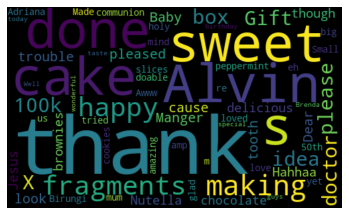

In [65]:
allwords = " ". join([twts for twts in df["tweet"]])
wordcloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.show()

In [15]:
import re
t ="This is a text with a URL https://www.java2blog.com/ to remove."
s1 = re.sub('http://\S+|https://\S+', '', t)
s2 = re.sub('http[s]?://\S+', '', t)
s3 = re.sub(r"http\S+", "", t)
print(s1)
print(s2)
print(s3)

This is a text with a URL  to remove.
This is a text with a URL  to remove.
This is a text with a URL  to remove.


In [16]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [56]:
x= df["replies_count"]
y= df["language"]

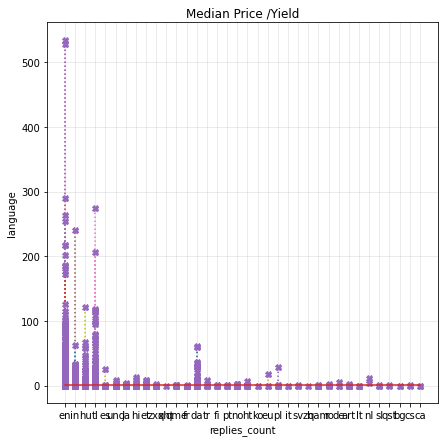

In [57]:
plt.figure(figsize=(7,7))
plt.stem(y,x,linefmt=":",markerfmt="X",bottom=np.nanmean(x),use_line_collection=False)
plt.title("Median Price /Yield")
plt.xlabel("replies_count")
plt.ylabel("language")
plt.grid(alpha=0.3)
plt.show()

In [78]:
clean_hashtags

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]